In [128]:
import pickle
import os
from tqdm import tqdm
import numpy as np

directory = 'data/train'

length_list = []
valence_values=[]

recordings = []

for filename in tqdm(os.listdir(directory)):
    if filename.endswith('.pkl'):
        file_path = os.path.join(directory, filename)
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            if data['valence'] != 2.333 and len(data['audio_data']) < 91000:
                length_list.append(len(data['audio_data']))
                valence_values.append(data['valence'])
                recordings.append(data['audio_data'])

valence_values = np.array(valence_values)
len(recordings)

100%|██████████| 10557/10557 [00:53<00:00, 198.68it/s]


10391

In [131]:
# Calculate the maximum length
max_length = max(length_list)

# Adjust the recordings to have the same length
adjusted_recordings = []
for recording in recordings:
    # Repeat the array until it reaches or exceeds the maximum length
    repeated_recording = np.tile(recording, (max_length // len(recording) + 1))[:max_length]
    adjusted_recordings.append(repeated_recording)

valence_values = np.array(valence_values)
len(adjusted_recordings), adjusted_recordings[0].shape


for i in adjusted_recordings:
    print(i.shape)

(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(90948,)
(

In [132]:
def round_to_nearest_quarter(number):
    # Assuming 'number' could be a numpy array with a single value
    if isinstance(number, np.ndarray) and number.size == 1:
        number = number.item()  # Convert single-item array to scalar
    
    # Ensure the number is within the 1 to 5 range before processing
    number = np.clip(number, 1, 5)
    # Scale number to shift quarters to whole numbers, round, and rescale
    rounded_number = np.round(number * 4) / 4
    # Clip again to ensure no out-of-range values after rounding
    rounded_number = np.clip(rounded_number, 1, 5)
    return str(rounded_number)

# Pre-process data

In [134]:
import torch
from torch.utils.data import TensorDataset, DataLoader


from sklearn.model_selection import train_test_split




############################################################################################################
# Pad the recordings to have the same length
max_length = max(len(array) for array in recordings)  # Find the maximum length

# # Pad each array to have the maximum length
# padded_arrays = np.array([np.pad(array, (0, max_length - len(array)), mode='constant') for array in recordings])


############################################################################################################
# Split the data and labels into training and testing sets
X_train, X_test_help, y_train, y_test_help = train_test_split(adjusted_recordings, valence_values, test_size=0.4, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test_help, y_test_help, test_size=0.5, random_state=42)



############################################################################################################
# Create a DataLoader for the training set, test set, and validation set

batch_size = 256  # You can adjust the batch size depending on your system's capability

# Convert input data and labels to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Use float32 for labels

# Create a dataset from tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

############################################################################################################
# Repeat the same process for the test set

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



############################################################################################################
# Repeat the same process for the validation set
X_validation_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)
y_validation_tensor = torch.tensor(y_val, dtype=torch.float32)

validation_dataset = TensorDataset(X_validation_tensor, y_validation_tensor)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)




C:\Users\20211445\AppData\Local\Temp\ipykernel_6968\315125929.py:32: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:248.)
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)  # Use float32 for input features


In [135]:
train_loader.dataset.tensors[0].shape, train_loader.dataset.tensors[1].shape

(torch.Size([6234, 1, 90948]), torch.Size([6234]))

In [207]:
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torchaudio.transforms as transforms


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()



        # Set random seed for reproducibility
        torch.manual_seed(42)


        self.mfcc_transform = transforms.MFCC(
            sample_rate=44100,      ## 44.1 kHz
            n_mfcc=40              ## Created channels
        )

        self.layers = nn.ModuleList()
        
        self.layers.append(nn.BatchNorm1d(40))
        conv1 = nn.Conv1d(in_channels=40, out_channels=60, kernel_size=7, padding=1)
        nn.init.kaiming_normal_(conv1.weight, nonlinearity='relu')
        self.layers.append(conv1)
        self.layers.append(nn.BatchNorm1d(60))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=3))
        self.layers.append(nn.Dropout(0.25))

        conv2 = nn.Conv1d(in_channels=60, out_channels=40, kernel_size=7, padding=1)
        nn.init.kaiming_normal_(conv2.weight, nonlinearity='relu')
        self.layers.append(conv2)
        self.layers.append(nn.BatchNorm1d(40))
        self.layers.append(nn.ReLU())


        conv3 = nn.Conv1d(in_channels=40, out_channels=10, kernel_size=7, padding=1)
        nn.init.kaiming_normal_(conv3.weight, nonlinearity='relu')
        self.layers.append(conv3)
        self.layers.append(nn.BatchNorm1d(10))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.MaxPool1d(kernel_size=3))
        self.layers.append(nn.Dropout(0.25))


        self.layers.append(nn.Flatten())

        linear1= nn.Linear(470,256)
        nn.init.kaiming_normal_(linear1.weight, nonlinearity='relu')
        self.layers.append(linear1)
        self.layers.append(nn.ReLU())
        
        linear2 = nn.Linear(256, 1)
        nn.init.kaiming_normal_(linear2.weight, nonlinearity='relu')
        self.layers.append(linear2)


    
    def forward(self, x):
        x = self.mfcc_transform(x)
        x = x.squeeze(1)
        for layer in self.layers:
            x = layer(x)
            #print(x.shape)
        return x.view(-1)


### CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Training Cycle

def train_model(MLP_model, optimizer, num_epochs):
        criterion = nn.MSELoss()
        #criterion = nn.L1Loss()
        # Training loop
        for epoch in tqdm(range(num_epochs)):
            total_loss = 0

            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
                outputs = MLP_model(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute the loss
                loss.backward()  # Backward pass

                optimizer.step()

                # Store the loss. loss.item() gets the value in a tensor. This only works for scalars.
                total_loss += loss.item()
        
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')
            if epoch > 1:
                print(evaluate_model(MLP_model, validation_loader,conf=False))
            print('--------------------------------------------------')
        print(evaluate_model(MLP_model, train_loader,conf=True))


def evaluate_model(MLP_model, test_loader,conf=False):
    with torch.no_grad():
        ### Calculate MSE 
        predictions = []
        actuals = []
        actuals_for_cm = []
        rounded_predictions = []
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = MLP_model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
            actuals_for_cm.extend([str(label) for label in labels.cpu().numpy()])
            rounded_predictions.extend([str(round_to_nearest_quarter(output)) for output in outputs.cpu().numpy()])

        predictions = np.array(predictions)
        actuals = np.array(actuals)
        mse = np.mean((predictions - actuals) ** 2)
        mae = np.mean(np.abs(predictions - actuals))
        print(f'Mean Squared Error: {mse:.4f} and Mean Absolute Error: {mae:.4f}')

        # for i in range(10):
        #     print(f"Predictions: {predictions[i]}")
        #     print(f"Actuals: {actuals[i]}")
        #     print(f"Rounded Predictions: {rounded_predictions[i]}")
        
        ##################
        # Confusion Matrix
        ##################
        if conf:
            ### Confusion Matrix
            cm = confusion_matrix(actuals_for_cm, rounded_predictions)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(actuals), yticklabels=np.unique(actuals))
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.title('Confusion Matrix')
            plt.show()
            ### Accuracy
            accuracy = np.trace(cm) / np.sum(cm)
            print(f'Accuracy: {accuracy:.4f}')
            
        

        


  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:05<04:19,  5.29s/it]

Epoch [1/50], Loss: 3.6735
--------------------------------------------------


  4%|▍         | 2/50 [00:10<04:02,  5.06s/it]

Epoch [2/50], Loss: 1.2767
--------------------------------------------------
Epoch [3/50], Loss: 0.9891


  6%|▌         | 3/50 [00:16<04:26,  5.67s/it]

Mean Squared Error: 1.0218 and Mean Absolute Error: 0.7977
None
--------------------------------------------------
Epoch [4/50], Loss: 0.8221


  8%|▊         | 4/50 [00:23<04:36,  6.01s/it]

Mean Squared Error: 0.8741 and Mean Absolute Error: 0.7655
None
--------------------------------------------------
Epoch [5/50], Loss: 0.8102


 10%|█         | 5/50 [00:30<04:50,  6.45s/it]

Mean Squared Error: 0.6751 and Mean Absolute Error: 0.6704
None
--------------------------------------------------
Epoch [6/50], Loss: 0.6910


 12%|█▏        | 6/50 [00:36<04:46,  6.51s/it]

Mean Squared Error: 0.8308 and Mean Absolute Error: 0.7185
None
--------------------------------------------------
Epoch [7/50], Loss: 0.7276


 14%|█▍        | 7/50 [00:43<04:43,  6.60s/it]

Mean Squared Error: 0.6598 and Mean Absolute Error: 0.6555
None
--------------------------------------------------
Epoch [8/50], Loss: 0.6239


 16%|█▌        | 8/50 [00:50<04:39,  6.64s/it]

Mean Squared Error: 0.6850 and Mean Absolute Error: 0.6800
None
--------------------------------------------------
Epoch [9/50], Loss: 0.6611


 18%|█▊        | 9/50 [00:57<04:32,  6.64s/it]

Mean Squared Error: 0.6591 and Mean Absolute Error: 0.6669
None
--------------------------------------------------
Epoch [10/50], Loss: 0.6147


 20%|██        | 10/50 [01:03<04:26,  6.66s/it]

Mean Squared Error: 0.6221 and Mean Absolute Error: 0.6383
None
--------------------------------------------------
Epoch [11/50], Loss: 0.6175


 22%|██▏       | 11/50 [01:10<04:24,  6.79s/it]

Mean Squared Error: 0.6680 and Mean Absolute Error: 0.6505
None
--------------------------------------------------
Epoch [12/50], Loss: 0.6002


 24%|██▍       | 12/50 [01:17<04:14,  6.69s/it]

Mean Squared Error: 0.6123 and Mean Absolute Error: 0.6324
None
--------------------------------------------------
Epoch [13/50], Loss: 0.5558


 26%|██▌       | 13/50 [01:23<04:06,  6.65s/it]

Mean Squared Error: 0.6133 and Mean Absolute Error: 0.6383
None
--------------------------------------------------
Epoch [14/50], Loss: 0.5741


 28%|██▊       | 14/50 [01:30<03:57,  6.60s/it]

Mean Squared Error: 0.6099 and Mean Absolute Error: 0.6405
None
--------------------------------------------------
Epoch [15/50], Loss: 0.5617


 30%|███       | 15/50 [01:36<03:49,  6.55s/it]

Mean Squared Error: 0.5931 and Mean Absolute Error: 0.6296
None
--------------------------------------------------
Epoch [16/50], Loss: 0.5442


 32%|███▏      | 16/50 [01:43<03:42,  6.55s/it]

Mean Squared Error: 0.5870 and Mean Absolute Error: 0.6223
None
--------------------------------------------------
Epoch [17/50], Loss: 0.5381


 34%|███▍      | 17/50 [01:49<03:35,  6.52s/it]

Mean Squared Error: 0.6060 and Mean Absolute Error: 0.6282
None
--------------------------------------------------
Epoch [18/50], Loss: 0.5482


 36%|███▌      | 18/50 [01:56<03:28,  6.51s/it]

Mean Squared Error: 0.5815 and Mean Absolute Error: 0.6171
None
--------------------------------------------------
Epoch [19/50], Loss: 0.5287


 38%|███▊      | 19/50 [02:02<03:21,  6.49s/it]

Mean Squared Error: 0.5620 and Mean Absolute Error: 0.6113
None
--------------------------------------------------
Epoch [20/50], Loss: 0.5217


 40%|████      | 20/50 [02:09<03:14,  6.47s/it]

Mean Squared Error: 0.5689 and Mean Absolute Error: 0.6181
None
--------------------------------------------------
Epoch [21/50], Loss: 0.5299


 42%|████▏     | 21/50 [02:15<03:06,  6.44s/it]

Mean Squared Error: 0.5648 and Mean Absolute Error: 0.6139
None
--------------------------------------------------
Epoch [22/50], Loss: 0.5269


 44%|████▍     | 22/50 [02:22<03:00,  6.44s/it]

Mean Squared Error: 0.5543 and Mean Absolute Error: 0.6056
None
--------------------------------------------------
Epoch [23/50], Loss: 0.4978


 46%|████▌     | 23/50 [02:28<02:53,  6.43s/it]

Mean Squared Error: 0.5417 and Mean Absolute Error: 0.5965
None
--------------------------------------------------
Epoch [24/50], Loss: 0.5034


 48%|████▊     | 24/50 [02:34<02:47,  6.44s/it]

Mean Squared Error: 0.5542 and Mean Absolute Error: 0.6021
None
--------------------------------------------------
Epoch [25/50], Loss: 0.5028


 50%|█████     | 25/50 [02:41<02:41,  6.48s/it]

Mean Squared Error: 0.5492 and Mean Absolute Error: 0.5998
None
--------------------------------------------------
Epoch [26/50], Loss: 0.4975


 52%|█████▏    | 26/50 [02:48<02:36,  6.51s/it]

Mean Squared Error: 0.5386 and Mean Absolute Error: 0.5989
None
--------------------------------------------------
Epoch [27/50], Loss: 0.4823


 54%|█████▍    | 27/50 [02:54<02:30,  6.52s/it]

Mean Squared Error: 0.5276 and Mean Absolute Error: 0.5891
None
--------------------------------------------------
Epoch [28/50], Loss: 0.4859


 56%|█████▌    | 28/50 [03:01<02:23,  6.52s/it]

Mean Squared Error: 0.5243 and Mean Absolute Error: 0.5909
None
--------------------------------------------------
Epoch [29/50], Loss: 0.4860


 58%|█████▊    | 29/50 [03:07<02:18,  6.62s/it]

Mean Squared Error: 0.5374 and Mean Absolute Error: 0.5968
None
--------------------------------------------------
Epoch [30/50], Loss: 0.4861


 60%|██████    | 30/50 [03:14<02:14,  6.74s/it]

Mean Squared Error: 0.5398 and Mean Absolute Error: 0.5993
None
--------------------------------------------------
Epoch [31/50], Loss: 0.4726


 62%|██████▏   | 31/50 [03:21<02:07,  6.69s/it]

Mean Squared Error: 0.5254 and Mean Absolute Error: 0.5892
None
--------------------------------------------------
Epoch [32/50], Loss: 0.4735


 64%|██████▍   | 32/50 [03:28<01:59,  6.64s/it]

Mean Squared Error: 0.5343 and Mean Absolute Error: 0.5928
None
--------------------------------------------------
Epoch [33/50], Loss: 0.4746


 66%|██████▌   | 33/50 [03:34<01:52,  6.59s/it]

Mean Squared Error: 0.5289 and Mean Absolute Error: 0.5912
None
--------------------------------------------------
Epoch [34/50], Loss: 0.4705


 68%|██████▊   | 34/50 [03:40<01:44,  6.53s/it]

Mean Squared Error: 0.5276 and Mean Absolute Error: 0.5920
None
--------------------------------------------------
Epoch [35/50], Loss: 0.4687


 70%|███████   | 35/50 [03:47<01:37,  6.49s/it]

Mean Squared Error: 0.5122 and Mean Absolute Error: 0.5835
None
--------------------------------------------------
Epoch [36/50], Loss: 0.4621


 72%|███████▏  | 36/50 [03:53<01:31,  6.51s/it]

Mean Squared Error: 0.5065 and Mean Absolute Error: 0.5837
None
--------------------------------------------------
Epoch [37/50], Loss: 0.4675


 74%|███████▍  | 37/50 [04:00<01:25,  6.55s/it]

Mean Squared Error: 0.5132 and Mean Absolute Error: 0.5857
None
--------------------------------------------------
Epoch [38/50], Loss: 0.4691


 76%|███████▌  | 38/50 [04:07<01:19,  6.66s/it]

Mean Squared Error: 0.5179 and Mean Absolute Error: 0.5885
None
--------------------------------------------------
Epoch [39/50], Loss: 0.4572


 78%|███████▊  | 39/50 [04:14<01:13,  6.69s/it]

Mean Squared Error: 0.5149 and Mean Absolute Error: 0.5837
None
--------------------------------------------------
Epoch [40/50], Loss: 0.4521


 80%|████████  | 40/50 [04:20<01:06,  6.64s/it]

Mean Squared Error: 0.5153 and Mean Absolute Error: 0.5825
None
--------------------------------------------------
Epoch [41/50], Loss: 0.4550


 82%|████████▏ | 41/50 [04:27<00:59,  6.59s/it]

Mean Squared Error: 0.5269 and Mean Absolute Error: 0.5866
None
--------------------------------------------------
Epoch [42/50], Loss: 0.4582


 84%|████████▍ | 42/50 [04:34<00:53,  6.65s/it]

Mean Squared Error: 0.5104 and Mean Absolute Error: 0.5799
None
--------------------------------------------------
Epoch [43/50], Loss: 0.4517


 86%|████████▌ | 43/50 [04:40<00:47,  6.74s/it]

Mean Squared Error: 0.5022 and Mean Absolute Error: 0.5730
None
--------------------------------------------------
Epoch [44/50], Loss: 0.4423


 88%|████████▊ | 44/50 [04:47<00:40,  6.80s/it]

Mean Squared Error: 0.5020 and Mean Absolute Error: 0.5770
None
--------------------------------------------------
Epoch [45/50], Loss: 0.4508


 90%|█████████ | 45/50 [04:54<00:33,  6.75s/it]

Mean Squared Error: 0.4930 and Mean Absolute Error: 0.5728
None
--------------------------------------------------
Epoch [46/50], Loss: 0.4447


 92%|█████████▏| 46/50 [05:01<00:27,  6.80s/it]

Mean Squared Error: 0.5021 and Mean Absolute Error: 0.5818
None
--------------------------------------------------
Epoch [47/50], Loss: 0.4485


 94%|█████████▍| 47/50 [05:08<00:20,  6.80s/it]

Mean Squared Error: 0.5055 and Mean Absolute Error: 0.5838
None
--------------------------------------------------
Epoch [48/50], Loss: 0.4367


 96%|█████████▌| 48/50 [05:14<00:13,  6.70s/it]

Mean Squared Error: 0.5108 and Mean Absolute Error: 0.5858
None
--------------------------------------------------
Epoch [49/50], Loss: 0.4302


 98%|█████████▊| 49/50 [05:21<00:06,  6.65s/it]

Mean Squared Error: 0.4938 and Mean Absolute Error: 0.5730
None
--------------------------------------------------
Epoch [50/50], Loss: 0.4354


100%|██████████| 50/50 [05:28<00:00,  6.56s/it]

Mean Squared Error: 0.4986 and Mean Absolute Error: 0.5707
None
--------------------------------------------------


Mean Squared Error: 0.4292 and Mean Absolute Error: 0.5246


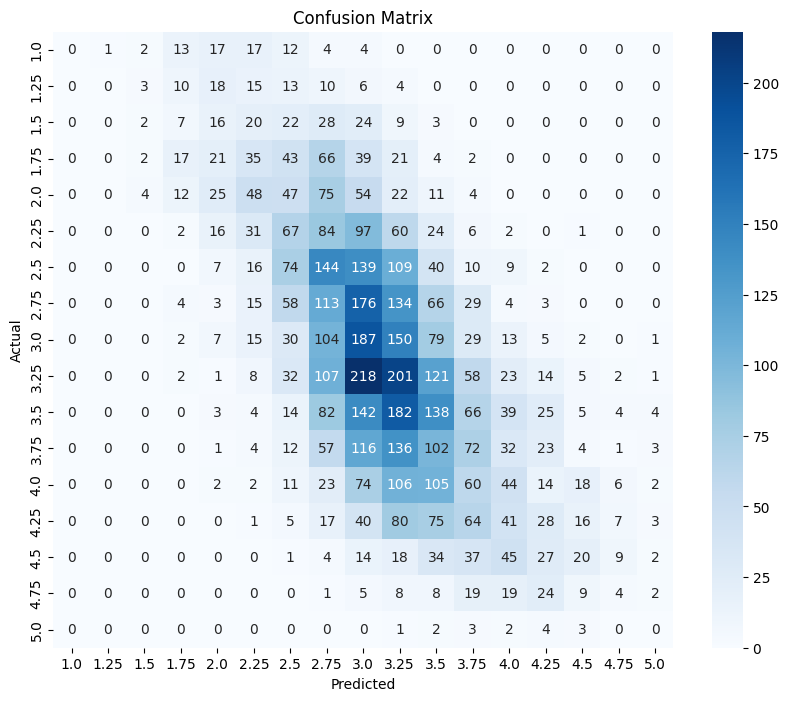

Accuracy: 0.1534
None


In [208]:
modelCNN = CNN().to(device)
#optimizer = optim.Adagrad(modelCNN.parameters(), lr=0.001, weight_decay=0.0001)
optimizer = optim.Adam(modelCNN.parameters(), lr=0.001)
#lr = 0.001
train_model(modelCNN, optimizer, num_epochs=50)

Mean Squared Error: 0.4890 and Mean Absolute Error: 0.5657


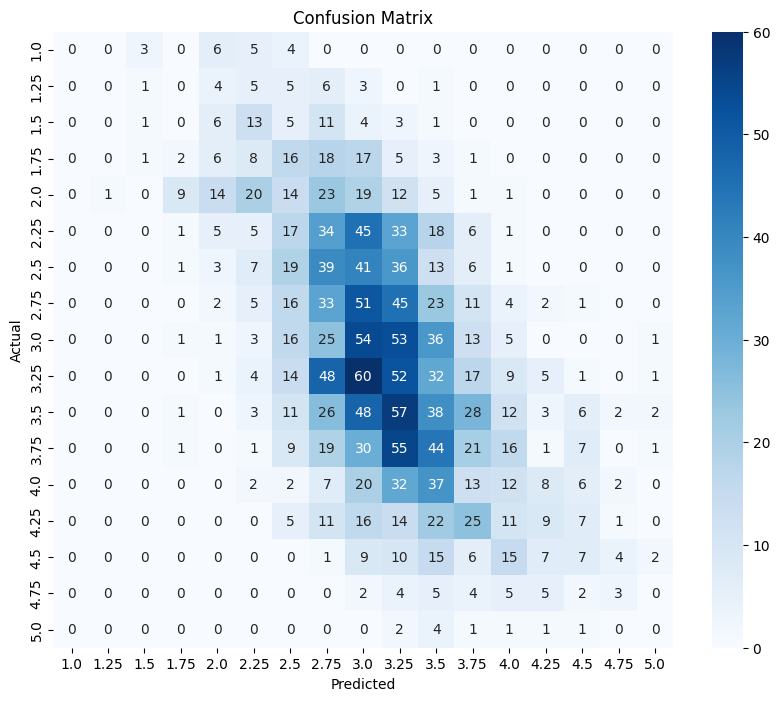

Accuracy: 0.1299


In [209]:
evaluate_model(modelCNN, test_loader,conf=True)

Mean Squared Error: 0.4162 and Mean Absolute Error: 0.5158


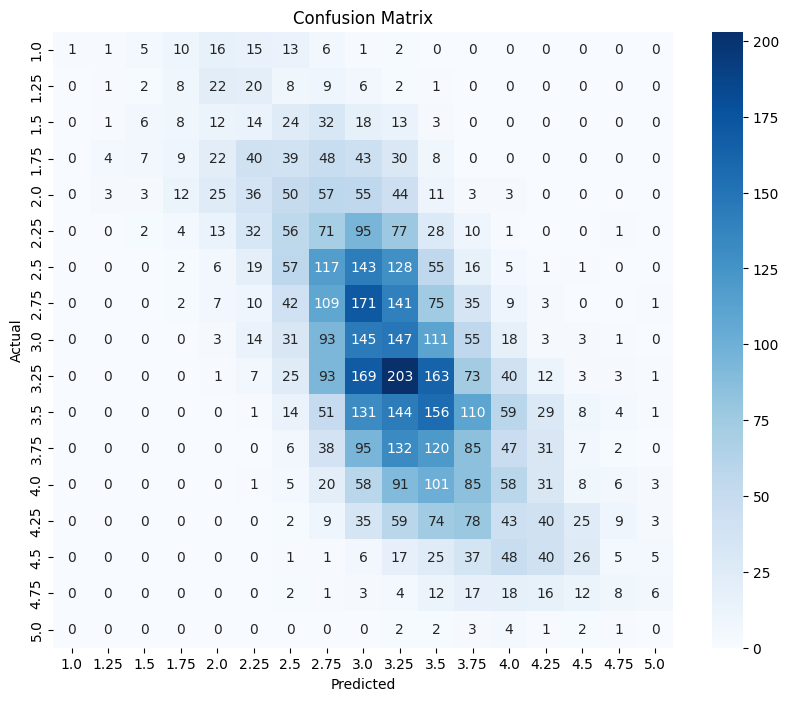

Accuracy: 0.1542


In [168]:
evaluate_model(modelCNN, train_loader,conf=True)